## **#1 Import Libraries**

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve,auc )

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt 

## **#2 Load Dataset**

In [2]:
dataset_url = 'https://media.githubusercontent.com/media/mohammadbinzouman/Online-Payments-and-Fraud-Detection/main/OnlinePayments.csv'
df = pd.read_csv(dataset_url)

## **#3 Preprocessing**

In [3]:
df.shape

(6362620, 11)

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
# Show the percentage of missing vlaues for each feature.
df.isna().mean().round(4) * 100
#msno.bar(df)

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
# Value distribution of the type feature.
print(df.type.value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [8]:
# Transform categorical features into numeric.
dummies = pd.get_dummies(df, columns=['type'], drop_first=False)
dummies.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


In [9]:
# Split the data into X = independent variables, y = depndent variable.
X = dummies[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']]
y = dummies[['isFraud']]

In [10]:
X.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [11]:
# Model evaluation using the Decision Tree classifier.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9997815365368354


In [12]:
# Target variable class distribution.
print(dummies.groupby('isFraud').size())

isFraud
0    6354407
1       8213
dtype: int64


In [13]:
# Model evaluation using cross validation.
cross_validator = ShuffleSplit(n_splits=10, random_state=42)

score_f1 = cross_val_score(model, X, y, scoring='f1_macro', cv=cross_validator).mean().round(2) * 100

print(score_f1)

# 5 folds = 95% f1-score. 6min run 
# 10 folds = 95% f1-score. 11-14min run

95.0


In [14]:
# prediction on a new example. [0 = Not Fraud, 1 = Fraud]
#                     amount  oldbalanceOrg	 newbalanceOrig	 oldbalanceDest   newbalanceDest  type_CASH_IN	 type_CASH_OUT	type_DEBIT	type_PAYMENT	type_TRANSFER
features = np.array([[9000,      9000,           0,               0,               9000,            0,              0,          0,           0,             1]])
print(model.predict(features))

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_

In [15]:
# Evaluating model
y_pred = model.predict(X_test)
y_predtrain = model.predict(X_train) 
     
confusion_matrix_train = confusion_matrix(y_train,y_predtrain)
classification_report_train = classification_report(y_train,y_predtrain)
print('Training set:- \n\n')
print("Accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Confusion Matrix:\n", confusion_matrix_train)
print("Classification Report:\n", classification_report_train)
print('-------------------------------------------------------')

confusion_matrix_test = confusion_matrix(y_test,y_pred)
classification_report_test = classification_report(y_test,y_pred)
print('Testing set:- \n\n')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix_test)
print("Classification Report:\n", classification_report_test)
print('-------------------------------------------------------\n')

print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1:", f1_score(y_test, y_pred, average='macro'))

Training set:- 


Accuracy: 1.0
Confusion Matrix:
 [[5718962       0]
 [      0    7396]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   5718962
           1       1.00      1.00      1.00      7396

    accuracy                           1.00   5726358
   macro avg       1.00      1.00      1.00   5726358
weighted avg       1.00      1.00      1.00   5726358

-------------------------------------------------------
Testing set:- 


Accuracy: 0.9997815365368354
Confusion Matrix:
 [[635385     60]
 [    79    738]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    635445
           1       0.92      0.90      0.91       817

    accuracy                           1.00    636262
   macro avg       0.96      0.95      0.96    636262
weighted avg       1.00      1.00      1.00    636262

----------------------------------------------------

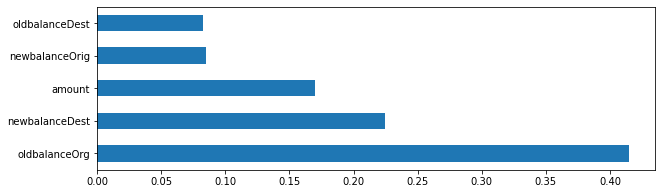

In [16]:
# Show the top 5 most important features.
features_importance = pd.Series(model.feature_importances_, index=X.columns)

features_importance.nlargest(5).plot(figsize=(10, 3), kind='barh')
plt.show()